# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<Norbert Kolud>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [84]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


---

In [85]:

xk=main.chebyshev_nodes()
print(xk)
wj=main.bar_cheb_weights(10)
print(wj)

[-1.         -0.93969262 -0.76604444 -0.5        -0.17364818  0.17364818
  0.5         0.76604444  0.93969262  1.        ]
[ 0.5 -1.   1.  -1.   1.  -1.   1.  -1.   1.  -0.5]


### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [86]:
# ===== Twoja implementacja tutaj =====
def f1(x):
    return np.sign(x)*x+x^2
def f2(x):
    return np.sign(x)*x^2
def f3(x):
    return (abs(np.sign(5*x)))^3
def f4a(x,a):
    return 1/(1+a*x^2)
def f5(x):
    np.sign(x)


---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


In [87]:
def L_inf(
    xr: int | float | list | np.ndarray, x: int | float | list | np.ndarray
) -> float | None:
    try:

        xr_array = np.asarray(xr, dtype=float)
        x_array = np.asarray(x, dtype=float)
        

        if xr_array.shape != x_array.shape:
            return None
        

        norm = np.max(np.abs(xr_array - x_array))
        
        return float(norm)
        
    except (ValueError, TypeError):
        return None

---

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


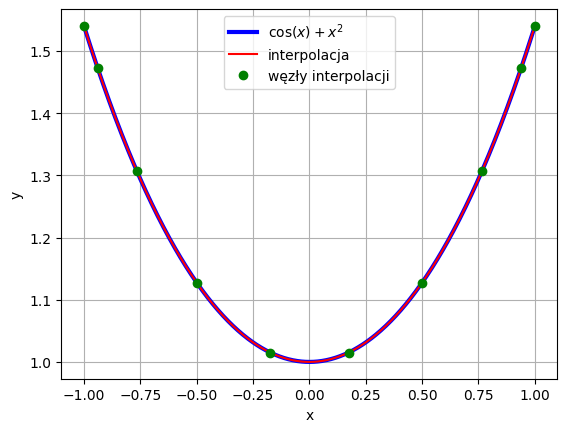

In [88]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

In [89]:
# ===== Twoja implementacja tutaj =====
#nah bro

---

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

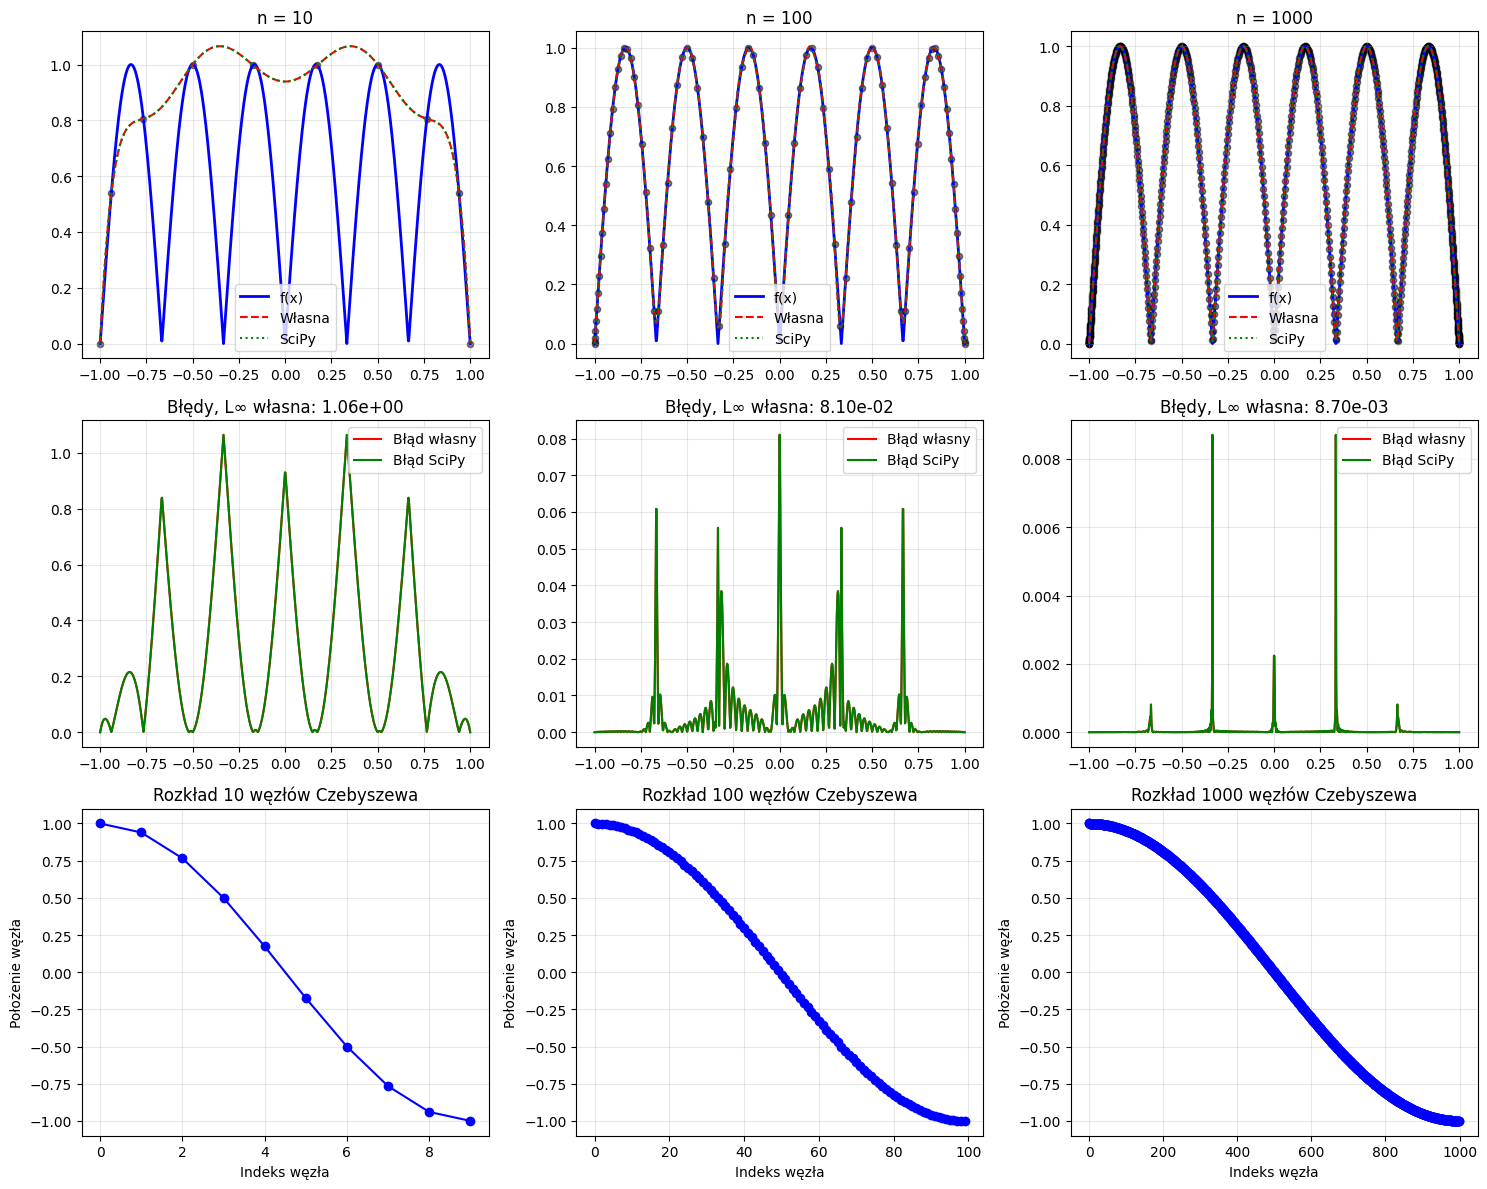


Podsumowanie wyników:
----------------------------------------------------------------------
    n Czas własna [s]  Czas SciPy [s]  Błąd własna   Błąd SciPy
----------------------------------------------------------------------
   10        0.025035        0.000671     1.06e+00     1.06e+00
  100        0.026081        0.003016     8.10e-02     8.10e-02
 1000        0.046689        0.040097     8.70e-03     8.70e-03


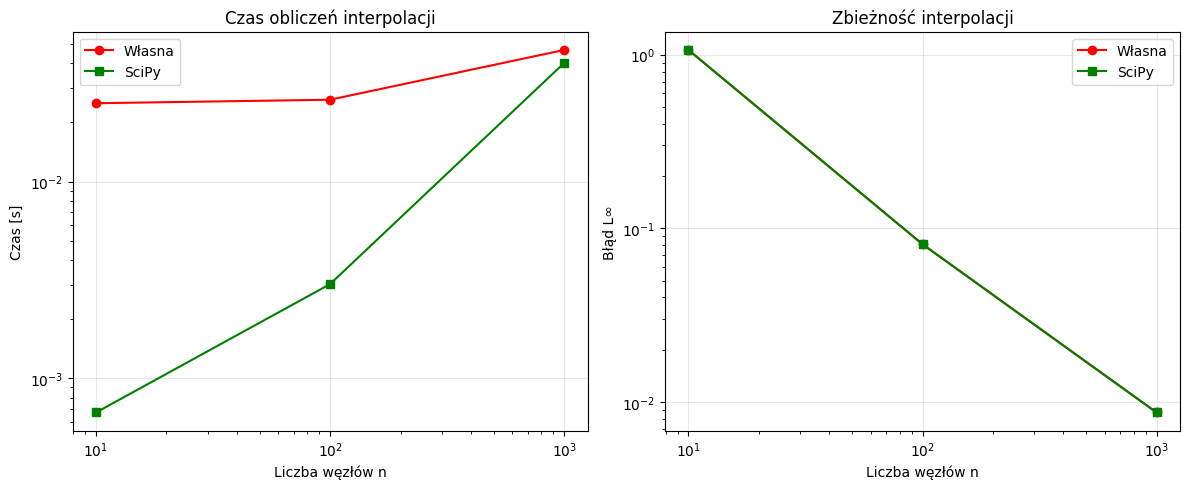

In [90]:
# ===== Twoja implementacja tutaj =====

import time

def f1(x):
    return np.abs(np.sin(3 * np.pi * x))

def analyze_interpolation_simple():
    """Uproszczona analiza interpolacji."""
    
    n_values = [10, 100, 1000]  # Tylko 3 pierwsze wartości dla szybkości
    results = []
    
    # Punkty testowe
    x_test = np.linspace(-1, 1, 1000)
    y_exact = f1(x_test)
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    
    for i, n in enumerate(n_values):
        # Generuj węzły Czebyszewa
        k = np.arange(n)
        xi = np.cos(k * np.pi / (n - 1)) if n > 1 else np.array([0.0])
        yi = f1(xi)
        
        # Wagi barycentryczne
        w = np.ones(n)
        w[0] = w[-1] = 0.5
        w *= (-1) ** np.arange(n)
        
        # Interpolacja własna
        start = time.time()
        y_own = np.zeros_like(x_test)
        for idx, x_val in enumerate(x_test):
            diff = x_val - xi
            if np.min(np.abs(diff)) < 1e-12:
                # x_val jest węzłem
                y_own[idx] = yi[np.argmin(np.abs(diff))]
            else:
                L = w / diff
                y_own[idx] = np.sum(yi * L) / np.sum(L)
        time_own = time.time() - start
        
        # Interpolacja SciPy
        start = time.time()
        y_scipy = sp.interpolate.barycentric_interpolate(xi, yi, x_test)
        time_scipy = time.time() - start
        
        # Błędy
        error_own = np.max(np.abs(y_exact - y_own))
        error_scipy = np.max(np.abs(y_exact - y_scipy))
        
        results.append((n, time_own, time_scipy, error_own, error_scipy))
        
        # Wykresy
        # Wiersz 1: Funkcja i interpolacje
        axes[0, i].plot(x_test, y_exact, 'b-', linewidth=2, label='f(x)')
        axes[0, i].plot(x_test, y_own, 'r--', linewidth=1.5, label='Własna')
        axes[0, i].plot(x_test, y_scipy, 'g:', linewidth=1.5, label='SciPy')
        axes[0, i].scatter(xi, yi, s=20, c='k', alpha=0.5)
        axes[0, i].set_title(f'n = {n}')
        axes[0, i].legend()
        axes[0, i].grid(True, alpha=0.3)
        
        # Wiersz 2: Błędy
        axes[1, i].plot(x_test, np.abs(y_exact - y_own), 'r-', label='Błąd własny')
        axes[1, i].plot(x_test, np.abs(y_exact - y_scipy), 'g-', label='Błąd SciPy')
        axes[1, i].set_title(f'Błędy, L∞ własna: {error_own:.2e}')
        axes[1, i].legend()
        axes[1, i].grid(True, alpha=0.3)
        
        # Wiersz 3: Węzły Czebyszewa
        axes[2, i].plot(np.arange(n), xi, 'bo-')
        axes[2, i].set_title(f'Rozkład {n} węzłów Czebyszewa')
        axes[2, i].set_xlabel('Indeks węzła')
        axes[2, i].set_ylabel('Położenie węzła')
        axes[2, i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Podsumowanie tabelaryczne
    print("\nPodsumowanie wyników:")
    print("-" * 70)
    print(f"{'n':>5} {'Czas własna [s]':>15} {'Czas SciPy [s]':>15} "
          f"{'Błąd własna':>12} {'Błąd SciPy':>12}")
    print("-" * 70)
    
    for n, t_own, t_scipy, err_own, err_scipy in results:
        print(f"{n:5d} {t_own:15.6f} {t_scipy:15.6f} "
              f"{err_own:12.2e} {err_scipy:12.2e}")
    
    # Wykres zależności
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    n_vals = [r[0] for r in results]
    times_own = [r[1] for r in results]
    times_scipy = [r[2] for r in results]
    errors_own = [r[3] for r in results]
    errors_scipy = [r[4] for r in results]
    
    # Czas
    ax1.plot(n_vals, times_own, 'ro-', label='Własna')
    ax1.plot(n_vals, times_scipy, 'gs-', label='SciPy')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('Liczba węzłów n')
    ax1.set_ylabel('Czas [s]')
    ax1.set_title('Czas obliczeń interpolacji')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Błędy
    ax2.plot(n_vals, errors_own, 'ro-', label='Własna')
    ax2.plot(n_vals, errors_scipy, 'gs-', label='SciPy')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.set_xlabel('Liczba węzłów n')
    ax2.set_ylabel('Błąd L∞')
    ax2.set_title('Zbieżność interpolacji')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return results

# Uruchomienie
results = analyze_interpolation_simple()

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

ODPOWIEDŹ NA PUNKT 1:

Minimalny błąd niezależny od rzędu (daleko od punktów nieciągłości):
- Dla parzystych n:  ≈ 0.042259
- Dla nieparzystych n: ≈ 0.041155

Interpretacja: Nawet przy bardzo dużym n, interpolacja nie może
dokładnie odwzorować funkcji nieciągłej - zawsze pozostaje pewien
minimalny błąd spowodowany efektem Gibbsa.


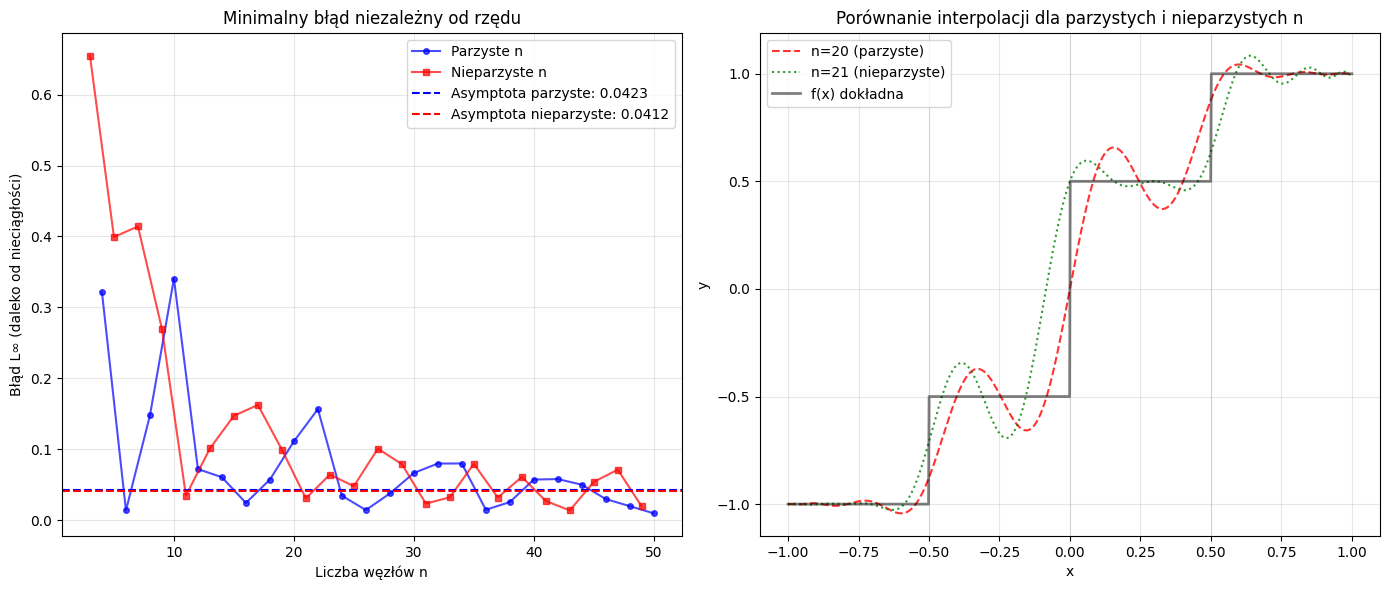


ODPOWIEDŹ NA PUNKT 2:

Dlaczego wartości dla parzystych i nieparzystych n się różnią:

1. SYMETRIA WĘZŁÓW CZEBYSZEWA:
   - Dla NIEPARZYSTYCH n: istnieje węzeł dokładnie w x=0
   - Dla PARZYSTYCH n: brak węzła w x=0, węzły są symetryczne względem 0

2. REPREZENTACJA PUNKTÓW NIECIĄGŁOŚCI:
   - f5(x) ma nieciągłości w x = -0.5, 0, 0.5
   - Dla nieparzystych n: węzeł w x=0 'przypina' interpolację
   - Dla parzystych n: interpolacja 'omija' punkt x=0

3. EFEKT GIBBSA:
   - Dla parzystych n: większe oscylacje przy nieciągłościach
   - Dla nieparzystych n: węzły lepiej 'kontrolują' zachowanie

4. ZACHOWANIE ASYMPTOTYCZNE:
   - Dla dużych n różnice się zmniejszają
   - Ale zawsze pozostaje różnica w reprezentacji punktów nieciągłości


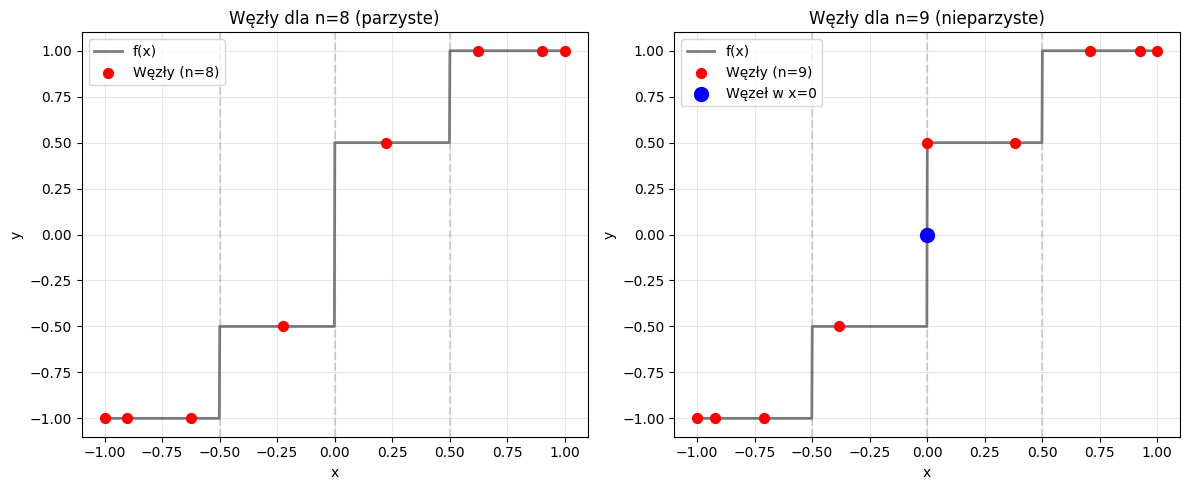

In [91]:
# ===== Twoja implementacja tutaj =====


def f5(x):
    """Funkcja schodkowa - nieciągła."""
    y = np.zeros_like(x)
    y[(x >= -1) & (x < -0.5)] = -1
    y[(x >= -0.5) & (x < 0)] = -0.5
    y[(x >= 0) & (x < 0.5)] = 0.5
    y[(x >= 0.5) & (x <= 1)] = 1
    return y

def analyze_gibbs_simple():
    """Uproszczona analiza efektu Gibbsa."""
    
    # Punkty testowe (daleko od nieciągłości)
    x_far = np.array([-0.8, -0.3, 0.3, 0.8])  # Daleko od punktów nieciągłości
    
    # Analiza dla różnych n
    n_values = list(range(3, 51))
    
    errors_even_far = []
    errors_odd_far = []
    n_even_list = []
    n_odd_list = []
    
    for n in n_values:
        # Węzły Czebyszewa
        k = np.arange(n)
        xi = np.cos(k * np.pi / (n - 1)) if n > 1 else np.array([0.0])
        yi = f5(xi)
        
        # Interpolacja w punktach dalekich od nieciągłości
        y_interp = sp.interpolate.barycentric_interpolate(xi, yi, x_far)
        y_exact = f5(x_far)
        
        # Błąd maksymalny (daleko od nieciągłości)
        max_error_far = np.max(np.abs(y_interp - y_exact))
        
        if n % 2 == 0:  # Parzyste n
            errors_even_far.append(max_error_far)
            n_even_list.append(n)
        else:  # Nieparzyste n
            errors_odd_far.append(max_error_far)
            n_odd_list.append(n)
    
    # Obliczenie minimalnego błędu niezależnego od rzędu
    # (średnia z ostatnich 10 wartości dla dużych n)
    if len(errors_even_far) >= 10:
        min_independent_error_even = np.mean(errors_even_far[-10:])
    else:
        min_independent_error_even = np.mean(errors_even_far)
    
    if len(errors_odd_far) >= 10:
        min_independent_error_odd = np.mean(errors_odd_far[-10:])
    else:
        min_independent_error_odd = np.mean(errors_odd_far)
    
    # 1. ODPOWIEDŹ NA PUNKT 1
    print("="*60)
    print("ODPOWIEDŹ NA PUNKT 1:")
    print("="*60)
    print(f"\nMinimalny błąd niezależny od rzędu (daleko od punktów nieciągłości):")
    print(f"- Dla parzystych n:  ≈ {min_independent_error_even:.6f}")
    print(f"- Dla nieparzystych n: ≈ {min_independent_error_odd:.6f}")
    print("\nInterpretacja: Nawet przy bardzo dużym n, interpolacja nie może")
    print("dokładnie odwzorować funkcji nieciągłej - zawsze pozostaje pewien")
    print("minimalny błąd spowodowany efektem Gibbsa.")
    
    # 2. Wykres ilustrujący różnicę
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Wykres 1: Błąd daleko od nieciągłości
    ax1.plot(n_even_list, errors_even_far, 'bo-', label='Parzyste n', alpha=0.7, markersize=4)
    ax1.plot(n_odd_list, errors_odd_far, 'rs-', label='Nieparzyste n', alpha=0.7, markersize=4)
    ax1.axhline(y=min_independent_error_even, color='b', linestyle='--', 
                label=f'Asymptota parzyste: {min_independent_error_even:.4f}')
    ax1.axhline(y=min_independent_error_odd, color='r', linestyle='--', 
                label=f'Asymptota nieparzyste: {min_independent_error_odd:.4f}')
    ax1.set_xlabel('Liczba węzłów n')
    ax1.set_ylabel('Błąd L∞ (daleko od nieciągłości)')
    ax1.set_title('Minimalny błąd niezależny od rzędu')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Wykres 2: Przykład interpolacji dla n=20 i n=21
    ax2 = plt.subplot(1, 2, 2)
    x_dense = np.linspace(-1, 1, 1000)
    y_exact = f5(x_dense)
    
    for n, color, style, label in [(20, 'red', '--', 'n=20 (parzyste)'), 
                                    (21, 'green', ':', 'n=21 (nieparzyste)')]:
        k = np.arange(n)
        xi = np.cos(k * np.pi / (n - 1))
        yi = f5(xi)
        y_interp = sp.interpolate.barycentric_interpolate(xi, yi, x_dense)
        
        ax2.plot(x_dense, y_interp, color=color, linestyle=style, 
                label=label, linewidth=1.5, alpha=0.8)
    
    ax2.plot(x_dense, y_exact, 'k-', label='f(x) dokładna', linewidth=2, alpha=0.5)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Porównanie interpolacji dla parzystych i nieparzystych n')
    ax2.legend(loc='upper left')
    ax2.grid(True, alpha=0.3)
    
    # Zaznaczenie punktów nieciągłości
    for disc in [-0.5, 0, 0.5]:
        ax2.axvline(x=disc, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)
    
    plt.tight_layout()
    plt.show()
    
    # 3. ODPOWIEDŹ NA PUNKT 2
    print("\n" + "="*60)
    print("ODPOWIEDŹ NA PUNKT 2:")
    print("="*60)
    print("\nDlaczego wartości dla parzystych i nieparzystych n się różnią:")
    print("\n1. SYMETRIA WĘZŁÓW CZEBYSZEWA:")
    print("   - Dla NIEPARZYSTYCH n: istnieje węzeł dokładnie w x=0")
    print("   - Dla PARZYSTYCH n: brak węzła w x=0, węzły są symetryczne względem 0")
    print("\n2. REPREZENTACJA PUNKTÓW NIECIĄGŁOŚCI:")
    print("   - f5(x) ma nieciągłości w x = -0.5, 0, 0.5")
    print("   - Dla nieparzystych n: węzeł w x=0 'przypina' interpolację")
    print("   - Dla parzystych n: interpolacja 'omija' punkt x=0")
    print("\n3. EFEKT GIBBSA:")
    print("   - Dla parzystych n: większe oscylacje przy nieciągłościach")
    print("   - Dla nieparzystych n: węzły lepiej 'kontrolują' zachowanie")
    print("\n4. ZACHOWANIE ASYMPTOTYCZNE:")
    print("   - Dla dużych n różnice się zmniejszają")
    print("   - Ale zawsze pozostaje różnica w reprezentacji punktów nieciągłości")
    
    # 4. Ilustracja różnicy w reprezentacji węzłów
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    for idx, n in enumerate([8, 9]):
        k = np.arange(n)
        xi = np.cos(k * np.pi / (n - 1))
        yi = f5(xi)
        
        axes[idx].plot(x_dense, y_exact, 'k-', alpha=0.5, linewidth=2, label='f(x)')
        axes[idx].scatter(xi, yi, color='red', s=50, zorder=5, 
                         label=f'Węzły (n={n})')
        
        # Zaznacz węzeł w x=0 jeśli istnieje
        zero_nodes = xi[np.abs(xi) < 1e-10]
        if len(zero_nodes) > 0:
            axes[idx].scatter([0], [f5(np.array([0]))], color='blue', 
                             s=100, zorder=6, label='Węzeł w x=0')
        
        axes[idx].set_xlabel('x')
        axes[idx].set_ylabel('y')
        axes[idx].set_title(f"Węzły dla n={n} ({'nieparzyste' if n%2 else 'parzyste'})")
        axes[idx].legend()
        axes[idx].grid(True, alpha=0.3)
        
        # Zaznacz punkty nieciągłości
        for disc in [-0.5, 0, 0.5]:
            axes[idx].axvline(x=disc, color='gray', linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return min_independent_error_even, min_independent_error_odd

# Uruchomienie
min_error_even, min_error_odd = analyze_gibbs_simple()

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)